#                                      Imputations ....


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to split  the datasets
from sklearn.model_selection import train_test_split
import datetime
from scipy import stats
from   pandas import  DataFrame


In [4]:
# from google.colab import drive 
# drive.mount('/content/gdrive')


In [5]:
import pandas as pd 

# X_train=pd.read_csv('gdrive/My Drive/Acc_FP/X_train.csv')
# X_test=pd.read_csv('gdrive/My Drive/Acc_FP/X_test.csv')
# X_dev=pd.read_csv('gdrive/My Drive/Acc_FP/X_dev.csv')
# y_train=pd.read_csv('gdrive/My Drive/Acc_FP/y_train.csv')
# y_test=pd.read_csv('gdrive/My Drive/Acc_FP/y_test.csv')
# y_dev=pd.read_csv('gdrive/My Drive/Acc_FP/y_dev.csv')

X_train=pd.read_csv('../X_train.csv')
X_test=pd.read_csv('../X_test.csv')
X_dev=pd.read_csv('../X_dev.csv')
y_train=pd.read_csv('../y_train.csv')
y_test=pd.read_csv('../y_test.csv')
y_dev=pd.read_csv('../y_dev.csv')


X_train.head()


,accident_day,accident_district,accident_district_hebrew,accident_hour,accident_hour_raw,accident_hour_raw_hebrew,accident_id,accident_minute,accident_month,accident_municipal_status,...,traffic_light_hebrew,vehicle_attribution,vehicle_attribution_hebrew,vehicle_damage,vehicle_damage_hebrew,vehicle_status,vehicle_type,vehicle_type_hebrew,weather,weather_hebrew
0,9,11,ירושלים,12,51,12:30-12:44,2018009337,30,11,NaN,...,לא ידוע,1.0,ישראלי,1.0,קל,0.0,1,רכב נוסעים פרטי,9,לא ידוע
1,18,24,עכו,7,29,NaN,2008007226,0,5,NaN,...,לא ידוע,1.0,ישראלי,NaN,NaN,NaN,1,רכב נוסעים פרטי,9,לא ידוע
2,26,41,השרון,8,35,NaN,2010014339,30,3,NaN,...,לא ידוע,1.0,ישראלי,NaN,NaN,NaN,12,מונית,9,לא ידוע
3,24,51,תל אביב,13,55,13:30-13:44,2017081241,30,4,0.0,...,לא ידוע,1.0,ישראלי,4.0,אין נזק,0.0,1,רכב נוסעים פרטי,9,לא ידוע
4,12,99,NaN,16,67,NaN,2012043901,30,6,99.0,...,לא ידוע,1.0,ישראלי,NaN,NaN,NaN,5,משא 12.1 עד 15.9 טון,1,בהיר


In [6]:
# PK  ==  provider_and_id
y_train["provider_and_id"]= X_train["provider_and_id"].copy()
y_test["provider_and_id"]= X_test["provider_and_id"].copy()
y_dev["provider_and_id"]= X_dev["provider_and_id"].copy()


In [7]:
y_train.shape , X_train.shape , y_test.shape , X_test.shape  , y_dev.shape  , X_dev.shape

((396202, 3),
 (396202, 90),
 (242573, 3),
 (242573, 90),
 (169801, 3),
 (169801, 90))

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
X_train.shape

(396202, 90)

In [10]:
float_col = X_train.select_dtypes(include=['float64']) # This will select float columns only

#print(float_col.columns.values)

# list(float_col.columns.values)
for col in float_col.columns.values:
    
    X_train[col] = X_train[col].astype('Int64')
    X_test[col] =  X_test[col].astype('Int64')
    X_dev[col] =    X_dev[col].astype('Int64')



In [11]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['accident_day',
 'accident_district',
 'accident_hour',
 'accident_hour_raw',
 'accident_id',
 'accident_minute',
 'accident_month',
 'accident_municipal_status',
 'accident_natural_area',
 'accident_region',
 'accident_type',
 'accident_year',
 'accident_yishuv_shape',
 'accident_yishuv_symbol',
 'car_id',
 'cross_direction',
 'cross_location',
 'cross_mode',
 'day_in_week',
 'day_night',
 'day_type',
 'didnt_cross',
 'driving_directions',
 'engine_volume',
 'geo_area',
 'id',
 'location_accuracy',
 'manufacturing_year',
 'multi_lane',
 'object_distance',
 'one_lane',
 'police_unit',
 'provider_and_id',
 'provider_code',
 'road_intactness',
 'road_light',
 'road_object',
 'road_shape',
 'road_sign',
 'road_surface',
 'road_type',
 'road_width',
 'seats',
 'speed_limit',
 'street1',
 'total_weight',
 'traffic_light',
 'vehicle_attribution',
 'vehicle_damage',
 'vehicle_status',
 'vehicle_type',
 'weather']

In [12]:

X_train_before = X_train.copy()
X_test_before = X_test.copy()
X_dev_before =  X_dev.copy()

X_train.shape

(396202, 90)

In [13]:
# find the variables with missing observations

X_train = X_train[numeric_cols]
X_test = X_test[numeric_cols]
X_dev = X_dev[numeric_cols]
print(len(X_train.columns))

vars_with_na = [var for var in X_train.columns if X_train[var].isnull().mean() > 0]
print(vars_with_na)
print(len(vars_with_na))


52
['accident_municipal_status', 'accident_natural_area', 'accident_region', 'accident_yishuv_shape', 'accident_yishuv_symbol', 'cross_location', 'cross_mode', 'driving_directions', 'manufacturing_year', 'multi_lane', 'one_lane', 'road_intactness', 'road_width', 'speed_limit', 'street1', 'total_weight', 'traffic_light', 'vehicle_attribution', 'vehicle_damage', 'vehicle_status']
20


In [14]:
## So 20 features will Imputed

data_na = X_train[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# print
data_na


,variable,na_percentage
0,accident_municipal_status,0.463652
18,vehicle_damage,0.447562
19,vehicle_status,0.434470
5,cross_location,0.431800
6,cross_mode,0.431313
9,multi_lane,0.408569
11,road_intactness,0.382520
15,total_weight,0.379556
12,road_width,0.365935
13,speed_limit,0.362318


In [15]:

vars_005 = data_na[ ( data_na["na_percentage"]  < 0.05) ]
vars_005 
  

,variable,na_percentage
8,manufacturing_year,0.040807
10,one_lane,0.038957
16,traffic_light,0.021671
17,vehicle_attribution,0.003963


In [16]:
col_005 = vars_005["variable"]
list(col_005)

['manufacturing_year', 'one_lane', 'traffic_light', 'vehicle_attribution']

In [17]:
X_trainORG= X_train.copy()

In [18]:
X_trainORG.shape

(396202, 52)

In [19]:
X_train[list(col_005)]

,manufacturing_year,one_lane,traffic_light,vehicle_attribution
0,2010,9,9,1
1,1998,9,9,1
2,2009,9,9,1
3,2011,9,9,1
4,2011,3,9,1
...,...,...,...,...
396197,2004,9,9,1
396198,2009,9,9,1
396199,2005,9,9,1
396200,2009,9,<NA>,1


In [20]:
def Drop_na(df):
    dfna = df.copy()
    dfnoMissing = dfna.dropna()
    print(df.shape  , dfnoMissing.shape)
    ##  the distribution of a feature before and after
    return dfnoMissing


In [21]:
X_trainbefore = X_train.copy()
X_testbefore = X_test.copy()
X_devbefore = X_dev.copy()


X_trainNoMissing = Drop_na(X_train[list(col_005)])
X_testNoMissing = Drop_na(X_test[list(col_005)])
X_devNoMissing = Drop_na(X_dev[list(col_005)])




(396202, 4) (359403, 4)
(242573, 4) (220017, 4)
(169801, 4) (153956, 4)


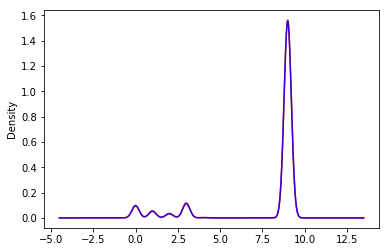

In [22]:
# plt before and after
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

#  data
# with NA
X_trainbefore['one_lane'].plot.density(color='red')

# without NA
X_trainNoMissing['one_lane'].plot.density(color='blue' ,alpha=0.8)

In [23]:
# can see it's the same .....

In [24]:
def diff(arr1, arr2):
    arr2 = set(arr2)
    return [item for item in arr1 if item not in arr2]


In [25]:
lotMissingCols = diff (vars_with_na, col_005)
lotMissingCols
 # cols to be imputed

['accident_municipal_status',
 'accident_natural_area',
 'accident_region',
 'accident_yishuv_shape',
 'accident_yishuv_symbol',
 'cross_location',
 'cross_mode',
 'driving_directions',
 'multi_lane',
 'road_intactness',
 'road_width',
 'speed_limit',
 'street1',
 'total_weight',
 'vehicle_damage',
 'vehicle_status']

In [26]:
X_trainORG.shape 

(396202, 52)

In [27]:

X_train=X_train.dropna(subset=col_005)
X_test=X_test.dropna(subset=col_005)
X_dev=X_dev.dropna(subset=col_005)
X_train.shape ,  X_test.shape  , X_dev.shape




((359403, 52), (220017, 52), (153956, 52))

In [28]:
# now the y_XXX should be sinchronized ....

In [29]:

y_train =y_train.loc[y_train['provider_and_id' ].isin(X_train['provider_and_id' ])]

y_test= y_test.loc[y_test['provider_and_id'].isin(X_test['provider_and_id']) ]
y_dev = y_dev.loc[y_dev['provider_and_id'].isin(X_dev['provider_and_id']) ]
y_train.shape , X_train.shape ,y_test.shape ,X_test.shape ,y_dev.shape , X_dev.shape


((359403, 3),
 (359403, 52),
 (220017, 3),
 (220017, 52),
 (153956, 3),
 (153956, 52))

In [30]:
#ggggggggggggggggggggggggggggggggggg
# IMPUTING NA  to  lotMissingCols  columns

In [31]:
lotMissingCols

['accident_municipal_status',
 'accident_natural_area',
 'accident_region',
 'accident_yishuv_shape',
 'accident_yishuv_symbol',
 'cross_location',
 'cross_mode',
 'driving_directions',
 'multi_lane',
 'road_intactness',
 'road_width',
 'speed_limit',
 'street1',
 'total_weight',
 'vehicle_damage',
 'vehicle_status']

In [32]:
lotMissingCols

['accident_municipal_status',
 'accident_natural_area',
 'accident_region',
 'accident_yishuv_shape',
 'accident_yishuv_symbol',
 'cross_location',
 'cross_mode',
 'driving_directions',
 'multi_lane',
 'road_intactness',
 'road_width',
 'speed_limit',
 'street1',
 'total_weight',
 'vehicle_damage',
 'vehicle_status']

In [33]:
X_train_org = X_train.copy()
X_test_org = X_test.copy()
X_dev_org = X_dev.copy()


In [34]:
# # Imputation to lotMissingCols ...

for col in lotMissingCols:
    X_train[ col +'_imputed'] = X_train[ col ].copy()
    X_test[ col +'_imputed'] = X_test[ col ].copy()
    X_dev[ col +'_imputed'] = X_dev[ col ].copy()
    
    #X_train.shape
    random_sample_train = X_train[col].dropna().sample(X_train[col].isnull().sum(), random_state=0)
    random_sample_test = X_train[col].dropna().sample(X_test[col].isnull().sum(), random_state=0)
    random_sample_dev = X_train[col].dropna().sample(  X_dev[col].isnull().sum(), random_state=0)

    

    
    random_sample_train.index = X_train[X_train[col].isnull()].index
    random_sample_test.index = X_test[X_test[col].isnull()].index
    random_sample_dev.index = X_dev[X_dev[col].isnull()].index

    X_train.loc[X_train[col].isnull(), col + '_imputed'] = random_sample_train
    X_test.loc[X_test[col].isnull(), col +'_imputed'] = random_sample_test
    X_dev.loc[X_dev[col].isnull(), col +'_imputed'] = random_sample_dev




In [35]:
print(X_train['accident_region'].isnull().sum())
X_train['accident_region_imputed'].isnull().sum()


26651


0

In [36]:

# X_train[['accident_region', 'accident_region_imputed']].hist(bins=30, figsize=(8,4))
# plt.show()

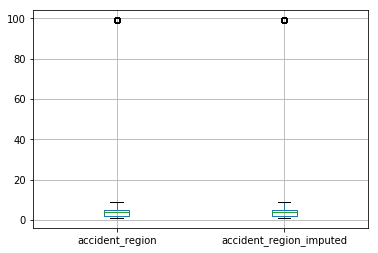

In [37]:
X_train[['accident_region', 'accident_region_imputed']].boxplot()

In [38]:

print( np.where(X_train.accident_region.isnull()))
np.where(X_train.accident_region_imputed.isnull())

(array([    30,     37,     53, ..., 359392, 359393, 359400], dtype=int64),)


(array([], dtype=int64),)

In [39]:

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
X_dev.reset_index(inplace=True, drop=True)

In [40]:
# Save the data

In [41]:
# drop all the lotMissingCols  cols 

In [42]:
X_train.shape
X_train.drop(lotMissingCols, axis=1 , inplace=True)
X_train.shape

(359403, 52)

In [43]:
print(X_test.shape)
X_test.drop(lotMissingCols, axis=1 , inplace=True)
print(X_test.shape)

print(X_dev.shape)
X_dev.drop(lotMissingCols, axis=1 , inplace=True)
X_dev.shape

(220017, 68)
(220017, 52)
(153956, 68)


(153956, 52)

In [44]:
# save only the numeric  . the 'o'  === String  only describes the numeric .

In [45]:

# save the data
# X_train.to_csv('gdrive/My Drive/Acc_FP/X_train_imputed.csv', index=False)
# X_test.to_csv('gdrive/My Drive/Acc_FP/X_test_imputed.csv' ,index=False)
# X_dev.to_csv('gdrive/My Drive/Acc_FP/X_dev_imputed.csv', index=False)

X_train.to_csv('../X_train_imputed.csv', index=False)
X_test.to_csv('../X_test_imputed.csv' ,index=False)
X_dev.to_csv('../X_dev_imputed.csv', index=False)



In [82]:
y_train.to_csv('../y_train_imputed.csv', index=False)
y_test.to_csv('../y_test_imputed.csv' ,index=False)
y_dev.to_csv('../y_dev_imputed.csv', index=False)


In [83]:
# !pip install missingno


In [84]:
# ### !pip install missingno
# import missingno as msno

# ### plot the missingness (nullity) matrix
# missingdata_df = X_train.columns[X_train.isnull().any()].tolist()
# msno.matrix(animals[missingdata_df])
